# Card Problem

Consider a deck of cards of length $N$ represented by the set

$$D = \{C_1, C_2, ..., C_N\},$$

where $D$ is the deck and $C_i$ is a card of number $i$. The cards are then placed upon a table by repeating following procedure until the deck is empty:

1. Move card from top of the deck to the table.
2. Move card from top of the deck to the bottom of the deck.

The goal therefore is to find a configuration of $D$ such that the cards are placed upon the table in an ascending order (i.e. from $i = 1$ to $i = N$)

In [1]:
import math

In [2]:
class Deque():
    '''Deque data type (Front at LHS)'''
    
    def __init__(self):
        self.items = []
        
    def __str__(self):
        return str(self.items)
    
    def addBack(self, item):
        self.items.append(item)
    
    def addFront(self, item):
        self.items.insert(0, item)
    
    def popBack(self):
        return self.items.pop()
    
    def popFront(self):
        return self.items.pop(0)
    
    def isEmpty(self):
        return self.items == []
    
    def length(self):
        return len(self.items)
    
    def reverse(self):
        self.items = self.items[::-1]

In [3]:
def arrange(deck, tableFirst=True):
    '''Takes final deck and returns original deck following unpack'''

    # Base case for recursion
    if deck.length() <= 1:
        return deck
    
    # Split deck into two sub-decks: top and bottom half
    deck1 = Deque()
    deck2 = Deque()
    if tableFirst:
        half = math.ceil(deck.length() / 2)
    else:
        half = math.floor(deck.length() / 2)
    for _ in range(half):
        deck1.addBack(deck.popFront())
    while not deck.isEmpty():
        deck2.addBack(deck.popFront())

    # If odd number of cards in deck, order of procedures is reversed
    if deck1.length() == deck2.length():
        deck2 = arrange(deck2, tableFirst)
    else:
        deck2 = arrange(deck2, not(tableFirst))
    
    # Merge two sub-decks back into main deck by alternating between each sub-deck 
    x = 1 if tableFirst else -1
    while not (deck1.isEmpty() and deck2.isEmpty()):
        if x == 1:
            deck.addBack(deck1.popFront())
        else:
            deck.addBack(deck2.popFront())
        x *= -1

    return deck

In [4]:
def workBackwards(deck):
    
    original = Deque()
    
    while not deck.isEmpty():
        if not original.isEmpty():
            original.addFront(original.popBack())
        original.addFront(deck.popBack())
    
    return original

In [5]:
def unpack(deck, tableFirst = True):
    '''Places cards "down" based on the rules: one card down, one card to bottom'''
    
    table = []
    
    x = 1 if tableFirst else -1
    while not deck.isEmpty():
        if x == 1:
            table.append(deck.popFront())
        else:
            deck.addBack(deck.popFront())
        x *= -1
            
    return table

In [6]:
NUM_CARDS = 13
print('Number of Cards: {}'.format(NUM_CARDS))

deck = Deque()
for card in range(1, NUM_CARDS+1):
    deck.addBack(card)

deck = arrange(deck)
print('Arranged: ' + str(deck))

table = unpack(deck)
print('Unpacked: ' + str(table))

Number of Cards: 13
Arranged: [1, 12, 2, 8, 3, 11, 4, 9, 5, 13, 6, 10, 7]
Unpacked: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [7]:
deck2 = Deque()
for card in range(1, NUM_CARDS+1):
    deck2.addBack(card)
    
deck2 = workBackwards(deck2)
print('Arranged: ' + str(deck2))

table2 = unpack(deck2)
print('Unpacked: ' + str(table2))

Arranged: [1, 12, 2, 8, 3, 11, 4, 9, 5, 13, 6, 10, 7]
Unpacked: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [8]:
# Checking for errors
MAX_CARDS = 1000
numCorrect = [None for _ in range(MAX_CARDS)]

for numCards in range(MAX_CARDS):
    deck = Deque()
    deck.items = list(range(1,numCards))
    deck = arrange(deck)
    table = unpack(deck)
    numCorrect[numCards] = (table == list(range(1, numCards)))

print('{} out of {} correct ({}%)'.format(numCorrect.count(True), 
                                          MAX_CARDS, 
                                          numCorrect.count(True)*100/MAX_CARDS))

1000 out of 1000 correct (100.0%)


Checking if it's actually faster to do it recursively (it's not)

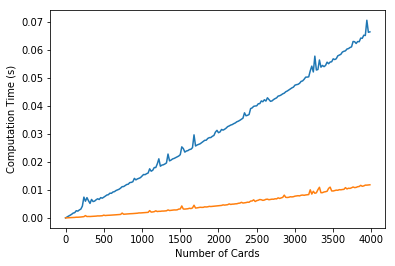

In [10]:
import timeit
from matplotlib import pyplot as plt

MAX_CARDS = 4000
rTimes = []
wbTimes = []

for numCards in range(0, MAX_CARDS, 20):
    recursion_timer = timeit.Timer('arrange(d)', 
                                   'from __main__ import Deque, arrange; d = Deque(); d.items = list(range(1, {}))'.format(numCards))
    rTime = recursion_timer.timeit(number=5)
    rTimes.append(rTime)
    
    workBack_timer = timeit.Timer('workBackwards(d2)', 
                                   'from __main__ import Deque, workBackwards; d2 = Deque(); d2.items = list(range(1, {}))'.format(numCards))
    wbTime = workBack_timer.timeit(number=5)
    wbTimes.append(wbTime)
    
plt.plot(list(range(0,MAX_CARDS,20)), rTimes)
plt.plot(list(range(0,MAX_CARDS,20)), wbTimes)
plt.xlabel('Number of Cards')
plt.ylabel('Computation Time (s)')
plt.show()